In [1]:
# !pip install torch torchvision

In [2]:
import numpy as np

In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

In [5]:
import skimage

In [6]:
import scipy

In [7]:
import PIL

In [8]:
import sklearn

In [9]:
import torch

In [10]:
import torchvision

# Task1

## 1.

In [179]:
## Below are the code of "harris.py"
"""
CLAB Task-1: Harris Corner Detector
Your name (Your uniID): u7752658
"""


def conv2(img, conv_filter):
    # flip the filter
    f_siz_1, f_size_2 = conv_filter.shape
    conv_filter = conv_filter[range(f_siz_1 - 1, -1, -1), :][:, range(f_siz_1 - 1, -1, -1)]
    pad = (conv_filter.shape[0] - 1) // 2
    result = np.zeros((img.shape))
    img = np.pad(img, ((pad, pad), (pad, pad)), 'constant', constant_values=(0, 0))
    filter_size = conv_filter.shape[0]
    for r in np.arange(img.shape[0] - filter_size + 1):
        for c in np.arange(img.shape[1] - filter_size + 1):
            curr_region = img[r:r + filter_size, c:c + filter_size]
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result)  # Summing the result of multiplication.
            result[r, c] = conv_sum  # Saving the summation in the convolution layer feature map.

    return result


def fspecial(shape=(3, 3), sigma=0.5):
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m + 1, -n:n + 1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

def calculateM(sigma,imageFile):
    # Parameters, add more if needed
    sigma = 2
    

    # Derivative masks
    dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    dy = dx.transpose()
    import matplotlib.pyplot as plt

    bw = plt.imread(imageFile)
    if(len(bw.shape)==3):
        bw = cv2.cvtColor(bw,cv2.COLOR_BGR2GRAY)
    bw = np.array(bw * 255, dtype=int)
    # computer x and y derivatives of image
    Ix = conv2(bw, dx)
    Iy = conv2(bw, dy)

    # Gaussian kernel
    g = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")
    # g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma)
    Iy2 = conv2(np.power(Iy, 2), g)
    Ix2 = conv2(np.power(Ix, 2), g)
    Ixy = conv2(Ix * Iy, g)

    return Ix2,Iy2,Ixy

thresh = 0.005
######################################################################
# Task: Compute the Harris Cornerness
######################################################################

#this is for method 2, in which R doesn't have real values
def my_harris(Ix2,Iy2,Ixy,thresh,k):# k=0.01-0.1# empirical constant
    a=np.ones(Ix2.shape)# a in quadratic
    b=-(Ix2+Iy2)# b in quadratic
    c=Ix2*Iy2-Ixy*Ixy# c in quadratic
    # print('a: ',a)
    # print('b: ',b)
    # print('c: ',c)
    lambda1=(-b-np.sqrt(b*b-4.0*a*c))/(2.0)# one solution
    lambda2=(-b+np.sqrt(b*b-4.0*a*c))/(2.0)# the other solution

    # print('lambda1: ',lambda1)
    # print('lambda2: ',lambda2)
    # print('lambda1*lambda2: ',lambda1*lambda2)

    detM = lambda1*lambda2# det M
    traceM = lambda1+lambda2# trace M
    R = detM-k*np.power(traceM,2)# computer corner response
    R = R/np.max(R)
    # print('R before thresholding: ',R)
    # find points with large R
    R[R<thresh] = 0
    # print('R after thresholding: ',R)
    R[R>=thresh] = 1
    return R

#this is for method 1, in which R has real values
def my_harris2(Ix2,Iy2,Ixy,thresh,k):# k=0.01-0.1# empirical constant
    a=np.ones(Ix2.shape)# a in quadratic
    b=-(Ix2+Iy2)# b in quadratic
    c=Ix2*Iy2-Ixy*Ixy# c in quadratic
    # print('a: ',a)
    # print('b: ',b)
    # print('c: ',c)
    lambda1=(-b-np.sqrt(b*b-4.0*a*c))/(2.0)# one solution
    lambda2=(-b+np.sqrt(b*b-4.0*a*c))/(2.0)# the other solution

    # print('lambda1: ',lambda1)
    # print('lambda2: ',lambda2)
    # print('lambda1*lambda2: ',lambda1*lambda2)

    detM = lambda1*lambda2# det M
    traceM = lambda1+lambda2# trace M
    R = detM-k*np.power(traceM,2)# computer corner response
    R = R/np.max(R)
    # print('R before thresholding: ',R)
    # find points with large R
    R[R<thresh] = 0
    # print('R after thresholding: ',R)
    # R[R>=thresh] = 1
    return R

# perfrom non-maximum suppresion
Ix2,Iy2,Ixy=calculateM(2,'Task1/Harris-1.jpg')
# R1 = my_harris(Ix2,Iy2,Ixy,thresh,0.01)
# R2 = my_harris(Ix2,Iy2,Ixy,thresh,0.05)
# R3 = my_harris(Ix2,Iy2,Ixy,thresh,0.1)
R1 = my_harris2(Ix2,Iy2,Ixy,thresh,0.01)

Ix2,Iy2,Ixy=calculateM(2,'Task1/Harris-2.jpg')
R2 = my_harris2(Ix2,Iy2,Ixy,thresh,0.1)

Ix2,Iy2,Ixy=calculateM(2,'Task1/Harris-3.jpg')
R3 = my_harris2(Ix2,Iy2,Ixy,thresh,0.1)

Ix2,Iy2,Ixy=calculateM(2,'Task1/Harris-4.jpg')
R4 = my_harris2(Ix2,Iy2,Ixy,thresh,0.1)


#for method 1, we need the R which has real values
# method 1
# def non_maximum_suppresion(R,D):
#     while(True):
#         if(np.max(R)==0):
#             return D
#         max=0
#         max=np.max(R)
#         ind=np.unravel_index(np.argmax(R,axis=None),R.shape)
#         print(ind)
#         # for i in range(R.shape[0]):
#         #     for j in range(R.shape[1]):
#         #         if (R[i][j]>max):
#         #             max=R[i][j]
#         #             max_i=i
#         #             max_j=j
#         R[ind]=0
#         D[ind]=max
#         print(D[ind])
#         if((ind[0]>0)&(ind[0]<=R.shape[0]-2)&(ind[1]>0)&(ind[1]<=R.shape[1]-2)):
#             for i in range(ind[0]-1,ind[0]+2):
#                 for j in range(ind[1]-1,ind[1]+2):
#                         R[i][j]=0


# method 2
def non_maximum_suppresion(origin_R,size):
    max=0
    R=origin_R.copy()

    # for k in range(7):
    #     max=0
    for i in range(0,R.shape[0]-size,size):
        for j in range(0,R.shape[1]-size,size):
                temp=[]
                for k in range(10):
                    # print('i: ',i,'j: ',j)
                    window=R[i:i+size,j:j+size]
                    # print(window)
                    ind=np.unravel_index(np.argmax(window,axis=None),window.shape)
                    temp.append(ind)
                    max=np.max(window)
                    for k in range(size):
                        for l in range(size):
                            R[i+k][j+l]=0
                    # R[i:i+7][j:j+7]=R[i:i+7][j:j+7]-R[i:i+7][j:j+7]
                for l in temp:
                    R[i+l[0]][j+l[1]]=max

    return R

    # for i in range(R.shape[0]-7):
    #     for j in range(R.shape[1]-7):
    #             k+=1
    #             if (R[i][j]>max):
    #                 max=R[i][j]
    #                 max_i=i
    #                 max_j=j
    #             R[i][j]=0
    #                 # window=R[i:i+7][j:j+7]
    # # R[i:i+7][j:j+7]=np.zeros((7,7))  
    #             if(k==7):
    #                 R[max_i][max_j]=max   
    #                 k=0          




######################################################################
# Task: Perform non-maximum suppression and
#       thresholding, return the N corner points
#       as an Nx2 matrix of x and y coordinates
######################################################################

#coners_compute


(370, 492)


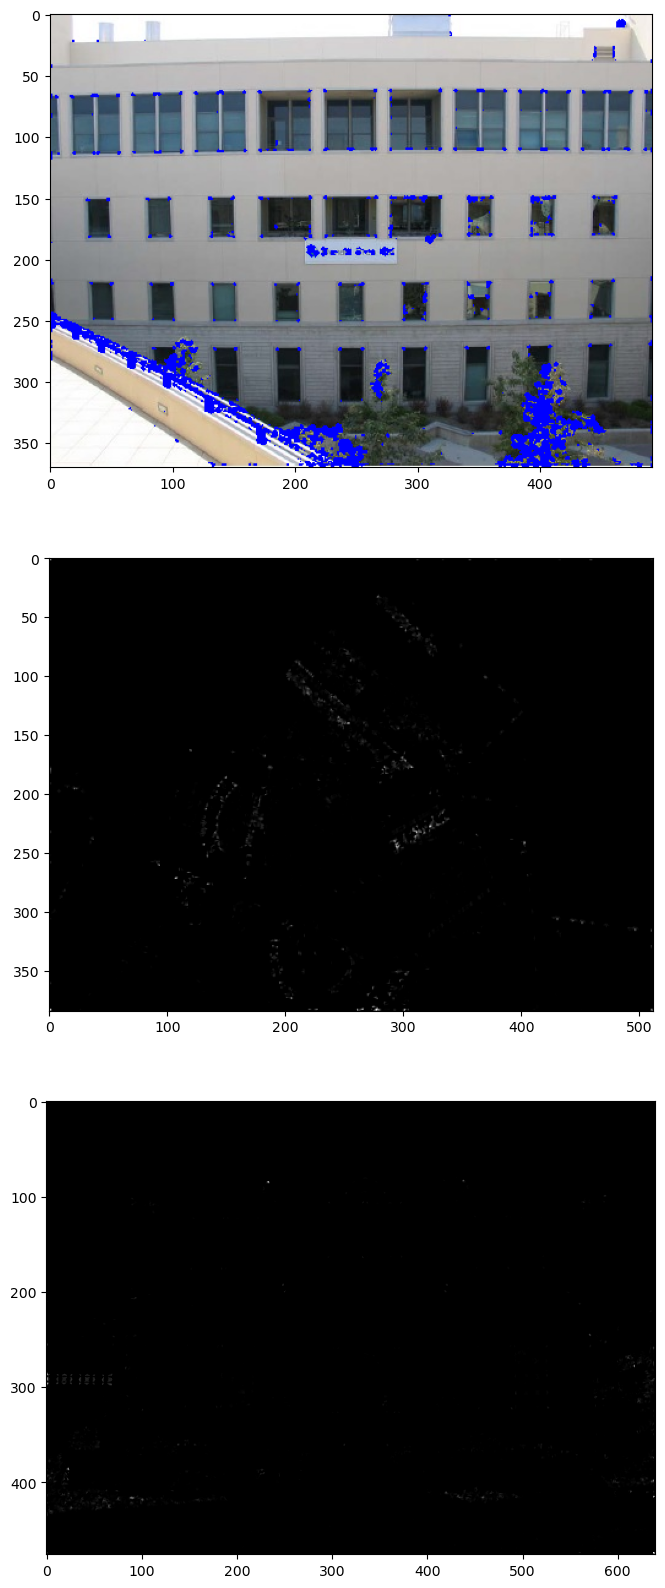

In [172]:
# figure


bw=plt.imread('Task1/Harris-1.jpg')
result = bw.copy()
plt.figure(figsize=(20,20))
print(R1.shape)
#thresholding for an optimal value
result[R1>0.0*R1.max()]=[0,0,255]
plt.subplot(3,1,1)
plt.imshow(result,cmap='gray')
# plt.axis('')
# plt.legend('cornerness')
# plt.annotate()
# plt.imshow(R1,cmap='gray')
plt.subplot(3,1,2)
plt.imshow(R2,cmap='gray')
plt.subplot(3,1,3)
plt.imshow(R3,cmap='gray')


(370, 492)
(370, 492)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.41978989 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(370, 492, 3)
bw (370, 492, 3)


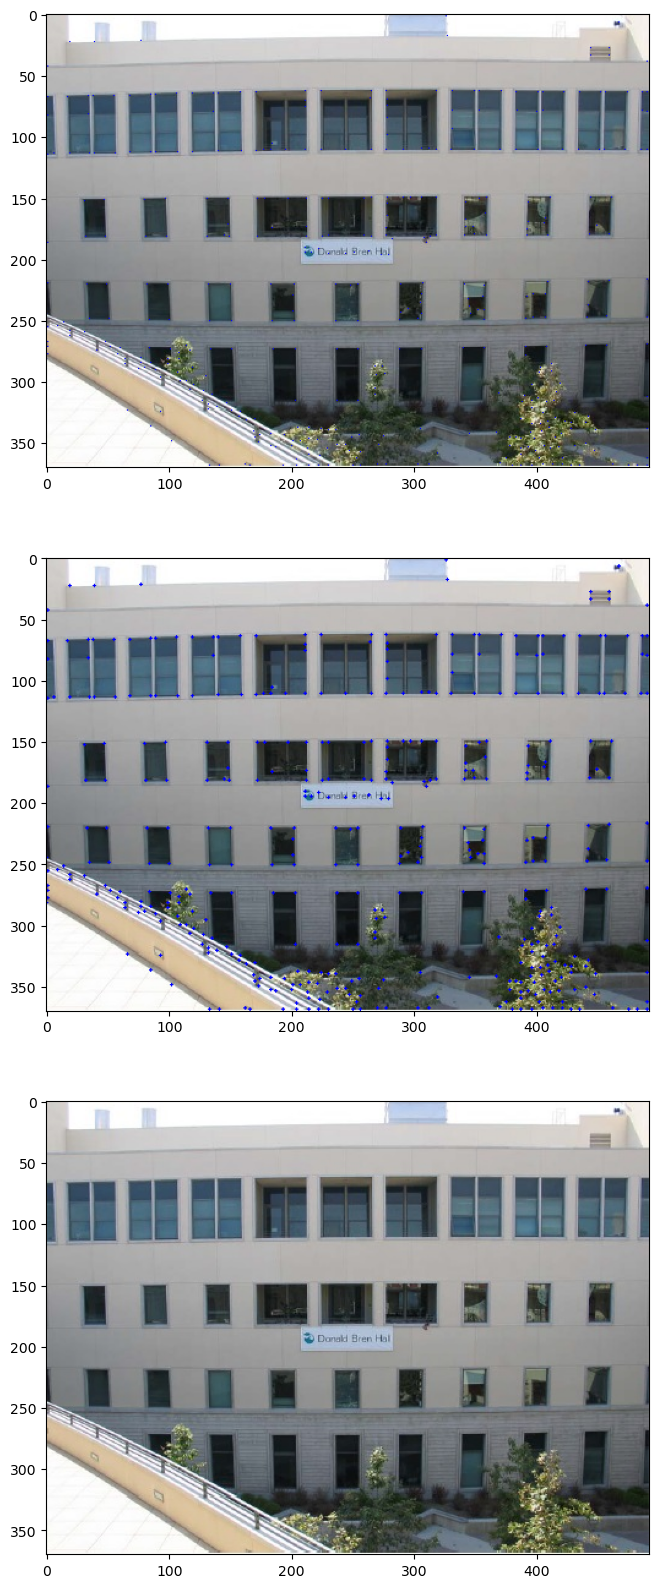

In [181]:
# test
def non_maximum_suppression(matrix, kernel_size=2):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))  # rectangular kernel
    maxed_matrix  = cv2.dilate(matrix, kernel)  # get maximum value in the window for each pixel
    non_maximum_suppression_matrix = matrix.copy()
    non_maximum_suppression_matrix[matrix != maxed_matrix] = 0  # set to 0 pixel originally are not local maxima
    return non_maximum_suppression_matrix

print(R1.shape)
np.set_printoptions(threshold=5)
D = np.zeros((R1.shape))# to store all final cornerss
print(D.shape)
R1_final=non_maximum_suppression(R1,7)

print(R1_final)

bw=plt.imread('Task1/Harris-1.jpg')
result1 = bw.copy()
print(bw.shape)
plt.figure(figsize=(20,20))
#thresholding for an optimal value
result1[R1_final>0.0*R1_final.max()]=[0,0,255]

height=bw.shape[0]
width=bw.shape[1]
bw_copy=bw.copy()
#  draw circle around the corners
for x in range(height):
    for y in range(width):
        if R1_final[x, y] != 0:
            cv2.circle(bw_copy, (y, x), 1, (0, 0, 255), -1)


plt.subplot(3,1,1)
plt.imshow(result1,cmap='gray')

plt.subplot(3,1,2)
plt.imshow(bw_copy,cmap='gray')

plt.subplot(3,1,3)
bw=plt.imread('Task1/Harris-1.jpg')
print('bw',bw.shape)
plt.imshow(bw,cmap='gray')


In [ ]:
#test
R=np.array([[1,2],[4,4]])
ind=np.unravel_index(np.argmax(R,axis=None),R.shape)
print(ind)

(1, 0)


## 2.

In [ ]:
# With changing of sigma, the slower the gaussian function converge to 0.
# A gaussian kernel requires 6*sigma - 1 values, 
# e.g. for a sigma of 3, it needs a kernel of length 17. 
# A running mean filter of 5 points will have a sigma of {\sqrt {2}. 
g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma)

## 3.

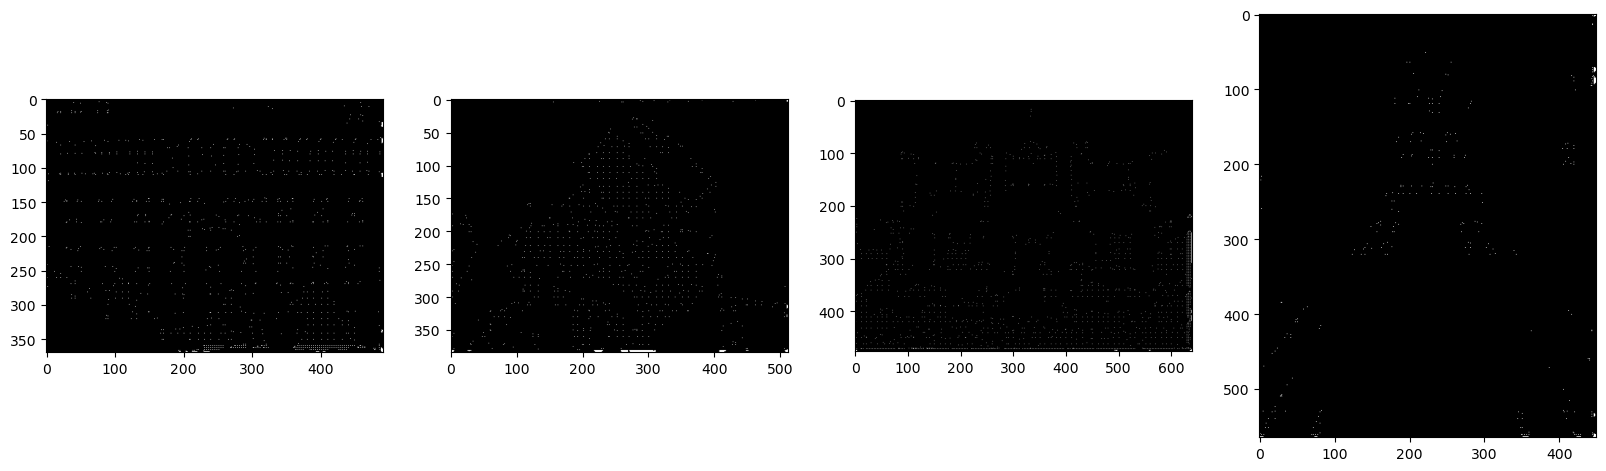

In [ ]:
R1_final=non_maximum_suppresion(R1,3)
R2_final=non_maximum_suppresion(R2,3)
R3_final=non_maximum_suppresion(R3,3)
R4_final=non_maximum_suppresion(R4,3)

R1_final=non_maximum_suppresion(R1_final,10)
R2_final=non_maximum_suppresion(R2_final,10)
R3_final=non_maximum_suppresion(R3_final,10)
R4_final=non_maximum_suppresion(R4_final,10)
# print(R1_final)
# print(np.max(R1_final))

plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(R1_final,cmap='gray')
plt.subplot(1,4,2)
plt.imshow(R2_final,cmap='gray')
plt.subplot(1,4,3)
plt.imshow(R3_final,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(R4_final,cmap='gray')

## 4.

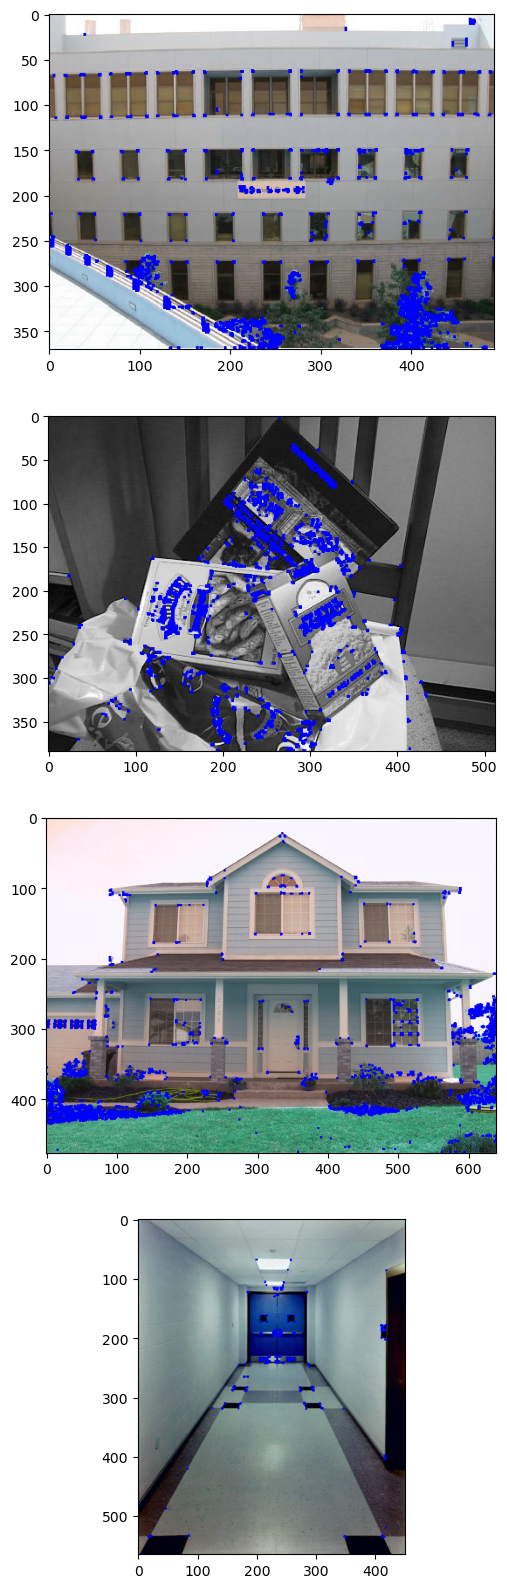

In [143]:
plt.figure(figsize=(20,20))

bw=cv2.imread('Task1/Harris-1.jpg')
gray=cv2.cvtColor(bw,cv2.COLOR_BGR2GRAY)
dst=cv2.cornerHarris(gray,2,3,0.04)
#for marking the corners
dst = cv2.dilate(dst,None)

#thresholding for an optimal value
bw[dst>0.01*dst.max()]=[0,0,255]
plt.subplot(4,1,1)
plt.imshow(bw)


bw=cv2.imread('Task1/Harris-2.jpg')
gray=cv2.cvtColor(bw,cv2.COLOR_BGR2GRAY)
dst=cv2.cornerHarris(gray,2,3,0.04)
#for marking the corners
dst = cv2.dilate(dst,None)

#thresholding for an optimal value
bw[dst>0.01*dst.max()]=[0,0,255]
plt.subplot(4,1,2)
plt.imshow(bw)


bw=cv2.imread('Task1/Harris-3.jpg')
gray=cv2.cvtColor(bw,cv2.COLOR_BGR2GRAY)
dst=cv2.cornerHarris(gray,2,3,0.04)
#for marking the corners
dst = cv2.dilate(dst,None)

#thresholding for an optimal value
bw[dst>0.01*dst.max()]=[0,0,255]
plt.subplot(4,1,3)
plt.imshow(bw)


bw=cv2.imread('Task1/Harris-4.jpg')
gray=cv2.cvtColor(bw,cv2.COLOR_BGR2GRAY)
dst=cv2.cornerHarris(gray,2,3,0.04)
#for marking the corners
dst = cv2.dilate(dst,None)

#thresholding for an optimal value
bw[dst>0.01*dst.max()]=[0,0,255]
plt.subplot(4,1,4)
plt.imshow(bw)




# bw2=plt.imread('Task1/Harris-2.jpg')
# bw3=plt.imread('Task1/Harris-3.jpg')
# bw4=plt.imread('Task1/Harris-4.jpg')

# gray2=cv2.cvtColor(bw2,cv2.COLOR_BGR2GRAY)
# gray3=cv2.cvtColor(bw3,cv2.COLOR_BGR2GRAY)
# gray4=cv2.cvtColor(bw4,cv2.COLOR_BGR2GRAY)




## 5.